<a href="https://colab.research.google.com/github/AmanVishwa/motion_Based_Elderly_Routine_analysis/blob/main/motion_Based_Elderly_Routine_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What Can You Tell Me About This Person? - A Data Analysis Challenge

---

Hi there!

We have prepped a CSV dump for you to work with. When you run the first cell with the `gdown` command, you will get a file named  `sample_data_for_user_663960.csv` in your local directory to load up.

This is the data collected by an IOT network of [PIR motion sensors](https://www.miicare.co.uk/products) deployed in the home of an older adult aged 80+ living alone in the UK. The sensors trigger and send data to our cloud when it detects motion in its vicinity every minute or so.

These are the fields which are relevant for your EDA:
1. `sTyp`: Type of ZIGBEE Sensor
2. `sloc`: Name of location covered by Motion sensor
3. `gwTz`: Timezone locale of the user
4. `rcvdTm`: Timestamp when the Motion sensor was triggered
5. `motion`: If the value is "Motion", then it is a motion event. Otherwise it is NOT
6. `isAppl`: Whether the event was created by an appliance or not


___What we want to see you do:___
1. Clean the data into a format that you can work with
2. Find interesting things about the older adult's "behavior" from the motion data. For example, you could try developing an approach to detect changes in the older adult's daily routine.
3. Remember: _don't write code for the sake of showing that you can write smart code: code for a purpose_

___Just in case you feel confused___

There is no need to fret. Don't rush, instead spend a day or two to think it over in the back of your head. Please feel free to ask me questions via the Internshala chat. I won't bite and I definitely won't hold it against you. (Or will I?)

It's always good to clarify rather than to waste your time.

_Time to show us what you can do_

---



Dexter,

MiiCare


In [ ]:
!gdown "1pv6YiFFuQ8VtJIvZyZKTtwqbF74GxniI"

Downloading...
From: https://drive.google.com/uc?id=1pv6YiFFuQ8VtJIvZyZKTtwqbF74GxniI
To: /content/sample_data_for_user_663960.csv
100% 12.1M/12.1M [00:00<00:00, 164MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("sample_data_for_user_663960.csv")
df.head(3)

,Unnamed: 0.1,Unnamed: 0,_id,sStat,motion,rcvdTm,ep,utc,Time,dateTag,...,sMID,sNm,sTyp,sTech,uqID,sloc,gwTz,isAppl,isExitD,__v
0,0,0,{'$oid': '612ebdbbc6841343c0f024f8'},"['0', '0', '0', '0', '1', '1', '0', '0', '0', ...",Motion,{'$date': '2021-08-31T23:39:33Z'},5.0,683768373,01-Sep-2021 00:39:33,20210901,...,F500D0FEFF2C6A3C,Sensor-D000F5,Motion Sensor,zigbee,663960,Bedroom,Europe/London,False,False,0
1,1,1,{'$oid': '612ebd25c6841343c0f02319'},"['0', '0', '0', '0', '1', '1', '0', '0', '0', ...",Motion,{'$date': '2021-08-31T23:37:07Z'},5.0,683768227,01-Sep-2021 00:37:07,20210901,...,F500D0FEFF2C6A3C,Sensor-D000F5,Motion Sensor,zigbee,663960,Bedroom,Europe/London,False,False,0
2,2,2,{'$oid': '612ea965c6841343c0efe15f'},"['0', '0', '0', '0', '1', '1', '0', '0', '0', ...",Motion,{'$date': '2021-08-31T22:12:25Z'},5.0,683763145,31-Aug-2021 23:12:25,20210831,...,F500D0FEFF2C6A3C,Sensor-D000F5,Motion Sensor,zigbee,663960,Bedroom,Europe/London,False,False,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38846 entries, 0 to 38845
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  38846 non-null  int64  
 1   Unnamed: 0    38846 non-null  int64  
 2   _id           38846 non-null  object 
 3   sStat         38846 non-null  object 
 4   motion        38846 non-null  object 
 5   rcvdTm        38846 non-null  object 
 6   ep            38809 non-null  float64
 7   utc           38846 non-null  int64  
 8   Time          38846 non-null  object 
 9   dateTag       38846 non-null  int64  
 10  inOut         38846 non-null  object 
 11  sBtLow        38809 non-null  object 
 12  sBtWar        38809 non-null  object 
 13  gwMID         38846 non-null  object 
 14  sMID          38809 non-null  object 
 15  sNm           38809 non-null  object 
 16  sTyp          38846 non-null  object 
 17  sTech         38846 non-null  object 
 18  uqID          38846 non-nu

In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,ep,utc,dateTag,uqID,__v
count,38846.000000,38846.000000,38809.000000,3.884600e+04,3.884600e+04,38846.0,38846.0
mean,986.933919,986.933919,4.717385,6.798240e+08,2.021072e+07,663960.0,0.0
std,578.337334,578.337334,1.024995,2.304742e+06,8.231608e+01,0.0,0.0
min,0.000000,0.000000,1.000000,6.758210e+08,2.021060e+07,663960.0,0.0
25%,485.000000,485.000000,5.000000,6.778339e+08,2.021062e+07,663960.0,0.0
50%,977.000000,977.000000,5.000000,6.798165e+08,2.021072e+07,663960.0,0.0
75%,1488.000000,1488.000000,5.000000,6.818237e+08,2.021081e+07,663960.0,0.0
max,1999.000000,1999.000000,5.000000,6.837684e+08,2.021090e+07,663960.0,0.0


In [ ]:
df.isnull().sum() #number of nan values in each feature

Unnamed: 0.1     0
Unnamed: 0       0
_id              0
sStat            0
motion           0
rcvdTm           0
ep              37
utc              0
Time             0
dateTag          0
inOut            0
sBtLow          37
sBtWar          37
gwMID            0
sMID            37
sNm             37
sTyp             0
sTech            0
uqID             0
sloc             0
gwTz            37
isAppl           0
isExitD          0
__v              0
dtype: int64

In [ ]:
df["motion"].unique()


array(['Motion'], dtype=object)

In [ ]:
df.groupby("sloc")["motion"].value_counts()


sloc             motion
Bathroom         Motion      825
Bedroom          Motion     6306
Cloakroom        Motion       32
Conservatory     Motion      738
Hallway          Motion     2742
Kitchen          Motion     6524
Livingroom       Motion    16194
Out of Location  Motion       37
Stairs           Motion     4222
Toilet           Motion     1226
Name: motion, dtype: int64

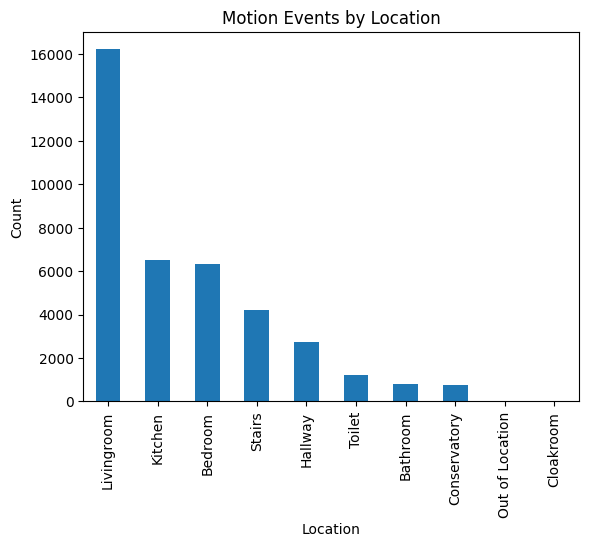

In [ ]:
# Plot the count of motion events by location
df["sloc"].value_counts().plot(kind="bar")
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Motion Events by Location")
plt.show()

In [ ]:
#cleaning the data and Keep only relevant columns
df = df[["sTyp","gwTz","rcvdTm", "sloc", "motion","isAppl"]]


In [ ]:
# extracting timestamp from dictionary format
df["rcvdTm"] = pd.to_datetime(df["rcvdTm"].apply(lambda x: eval(x)['$date']))


In [ ]:
# Define baseline period
baseline_start = df["rcvdTm"].max() - pd.DateOffset(months=1)
baseline_data = df[df["rcvdTm"] >= baseline_start]

# Calculate baseline behavior
baseline_hourly_counts = baseline_data.groupby([baseline_data["rcvdTm"].dt.hour, "sloc"]).size().unstack(fill_value=0)
current_hourly_counts = df.groupby([df["rcvdTm"].dt.hour, "sloc"]).size().unstack(fill_value=0)

# comparing current behavior with baseline
change_in_hourly_counts = current_hourly_counts - baseline_hourly_counts

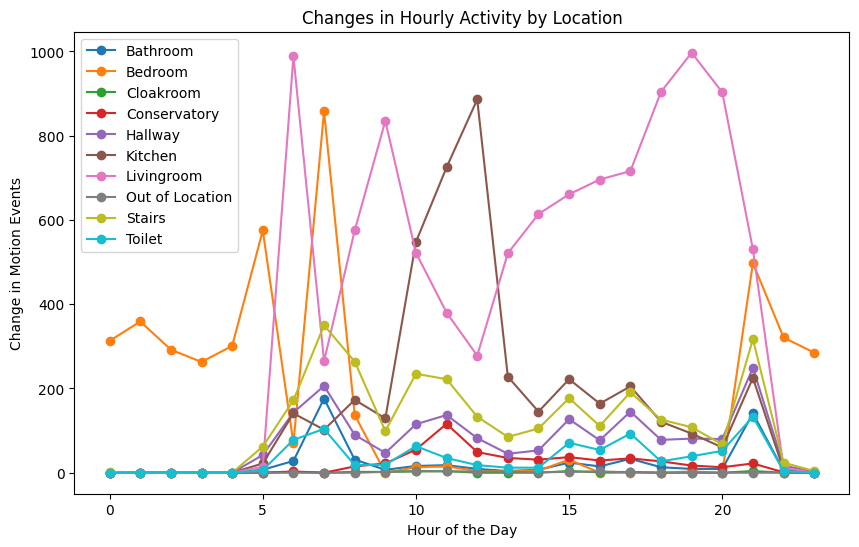

In [ ]:
# visualize changes in hourly activity by location
fig, ax = plt.subplots(figsize=(10, 6))
change_in_hourly_counts.plot(ax=ax, marker='o')
plt.xlabel("Hour of the Day")
plt.ylabel("Change in Motion Events")
plt.title("Changes in Hourly Activity by Location")
plt.legend(loc="upper left")
plt.show()



The generated plot can provide insights into the older adult's behavior and help detect changes in their daily routine based on the motion data. Here are some observations and interpretations that can be made from the plot:

**1) Peaks or spikes in the plot indicate higher activity levels than the baseline, suggesting periods of increased movement. Valleys or dips represent lower activity levels, indicating potential times of reduced or minimal movement.**

 **2) Analyzing the hourly activity patterns can reveal specific time segments where notable changes occur. For example, if there is a sudden increase in motion events during late-night hours when the older adult typically sleeps, it may indicate disrupted sleep patterns or nocturnal activities.**

**3) The plot's multiple lines represent different locations within the home. Analyzing the relative changes in activity across these locations can provide insights into the areas where the older adult spends more or less time. Significant shifts in activity distribution may suggest changes in mobility or preferences within the home.**

**4) Look for any abnormal spikes or drops in motion events that deviate significantly from the baseline. These anomalies could indicate irregularities or unexpected changes in the older adult's routine, which may warrant further investigation**